Week 1 :Start


Project Title :

Analyzing Public Opinion on Climate Change using Twitter Data

Problem Statement:

Climate change is one of the most pressing global issues, but public opinion on the topic varies widely. This project aims to classify tweets into categories (Pro, Anti, Neutral, News) to analyze sentiment trends and better understand how people perceive climate risks and disaster management.

Project Description:

This project uses a labeled Twitter dataset related to climate change to perform:


*   Exploratory Data Analysis (EDA)
*   Data Preprocessing
*   Sentiment Classification









In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('./sample_data/twitter_sentiment_data.csv')

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
 2   tweetid    43943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB
None


In [12]:
print(df.head())

   sentiment                                            message  \
0         -1  @tiniebeany climate change is an interesting h...   
1          1  RT @NatGeoChannel: Watch #BeforeTheFlood right...   
2          1  Fabulous! Leonardo #DiCaprio's film on #climat...   
3          1  RT @Mick_Fanning: Just watched this amazing do...   
4          2  RT @cnalive: Pranita Biswasi, a Lutheran from ...   

              tweetid  
0  792927353886371840  
1  793124211518832641  
2  793124402388832256  
3  793124635873275904  
4  793125156185137153  


In [13]:
print(df.describe())

          sentiment       tweetid
count  43943.000000  4.394300e+04
mean       0.853924  8.367966e+17
std        0.853543  8.568506e+16
min       -1.000000  5.926334e+17
25%        0.000000  7.970376e+17
50%        1.000000  8.402301e+17
75%        1.000000  9.020003e+17
max        2.000000  9.667024e+17


In [14]:
print(df.isnull().sum())

sentiment    0
message      0
tweetid      0
dtype: int64


Week 1: Ends

Week 2:Starts

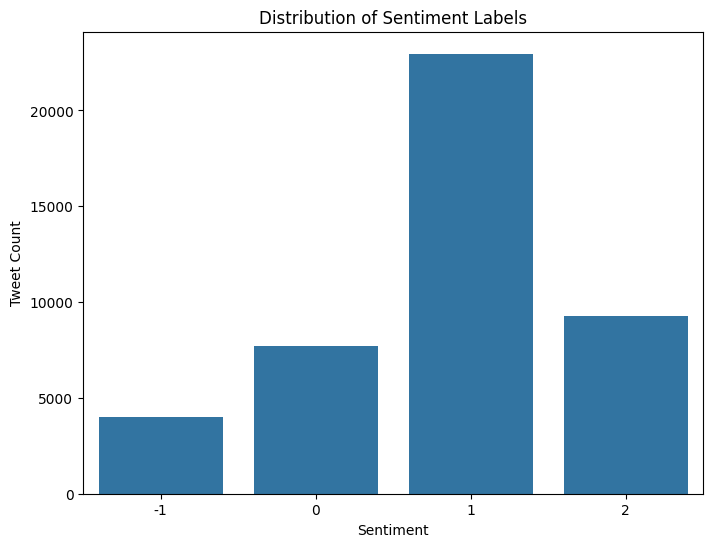

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

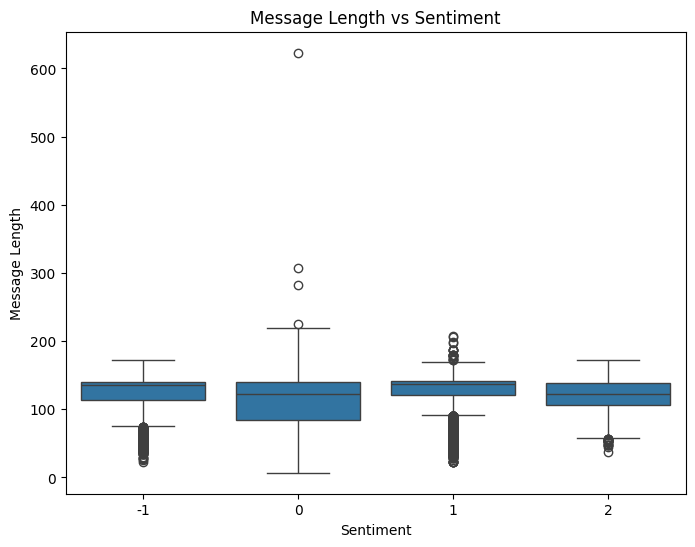

In [16]:
df['message_length'] = df['message'].apply(len)

plt.figure(figsize=(8,6))
sns.boxplot(x='sentiment', y='message_length', data=df)
plt.title('Message Length vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Message Length')
plt.show()

In [17]:
sentiment_map = {
    -1: 'Anti',
     0: 'Neutral',
     1: 'Pro',
     2: 'News'
}
df['sentiment_label'] = df['sentiment'].map(sentiment_map)


In [21]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)     # remove mentions
    text = re.sub(r'#', '', text)        # remove hashtag symbol
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # remove special characters
    text = text.lower()  # convert to lowercase
    return text

df['cleaned_message'] = df['message'].apply(clean_text)

print(df[['message', 'cleaned_message']].head())


                                             message  \
0  @tiniebeany climate change is an interesting h...   
1  RT @NatGeoChannel: Watch #BeforeTheFlood right...   
2  Fabulous! Leonardo #DiCaprio's film on #climat...   
3  RT @Mick_Fanning: Just watched this amazing do...   
4  RT @cnalive: Pranita Biswasi, a Lutheran from ...   

                                     cleaned_message  
0   climate change is an interesting hustle as it...  
1  rt  watch beforetheflood right here as  travel...  
2  fabulous leonardo dicaprios film on climate ch...  
3  rt  just watched this amazing documentary by l...  
4  rt  pranita biswasi a lutheran from odisha giv...  


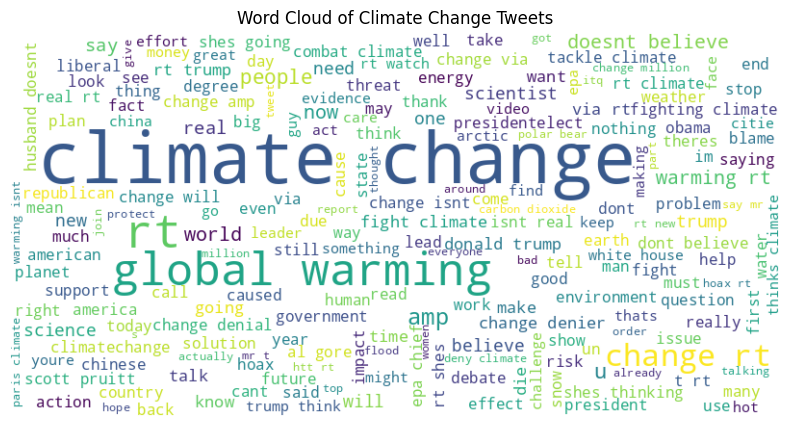

In [22]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(tweet for tweet in df.cleaned_message)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Climate Change Tweets')
plt.show()


In [18]:
selected_features = df[['message', 'sentiment', 'message_length']]

print(selected_features.head())

                                             message  sentiment  \
0  @tiniebeany climate change is an interesting h...         -1   
1  RT @NatGeoChannel: Watch #BeforeTheFlood right...          1   
2  Fabulous! Leonardo #DiCaprio's film on #climat...          1   
3  RT @Mick_Fanning: Just watched this amazing do...          1   
4  RT @cnalive: Pranita Biswasi, a Lutheran from ...          2   

   message_length  
0             137  
1             146  
2             117  
3             143  
4             139  


In [23]:
selected_features.to_csv('./sample_data/transformed_twitter_sentiment.csv', index=False)
print("Transformed dataset saved as 'transformed_twitter_sentiment.csv'")

Transformed dataset saved as 'transformed_twitter_sentiment.csv'


Week 2:Ends
